In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data

data = pd.read_csv('train.csv')
data.set_index(data['Id'],inplace = True)
data = data.iloc[:,1:]

display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [3]:
# problem 1

def percantageCounter(df: pd.DataFrame): 
    
    def __missingValues(series: pd.Series):
        all_nulls = series.isnull().sum()
        percantage = (all_nulls / series.shape[0]) * 100
        return round(percantage, 3)
    
    def __dfMaker(df: pd.DataFrame):
        all_nulls = df.isnull().sum()
        info_dict = {}
        for column in df.columns:
            df[column] = df[column].sort_values()
            info_dict[column] = __missingValues(df[column])
        perc_series = pd.Series(info_dict)
        result_df = pd.concat([all_nulls, perc_series], axis = 1, join = 'inner')
        result_df.rename(columns = {0:'all_nulls', 1:'percantage'}, inplace = True)
        return result_df
    
    result_df = __dfMaker(df = df)
    result_df.sort_values(by = 'all_nulls', ascending = False, inplace = True)
    return result_df
        
display(percantageCounter(data))


,all_nulls,percantage
PoolQC,1453,99.521
MiscFeature,1406,96.301
Alley,1369,93.767
Fence,1179,80.753
MasVnrType,872,59.726
...,...,...
Heating,0,0.000
HeatingQC,0,0.000
MSZoning,0,0.000
1stFlrSF,0,0.000


In [21]:
# problem 2

def numericalCols(df: pd.DataFrame):
    numeric_columns = df.select_dtypes(include = np.number).columns.to_list()
    new_df = df.loc[:,numeric_columns]
    return new_df

new_df = numericalCols(data)

# Correlation Matrix is saved as image in repository
def correlationCols(df: pd.DataFrame):
    corr = df.corr()
    display(corr)
    plt.figure(figsize = (12,12))
    sns.heatmap(corr, cmap = 'coolwarm')
    plt.title('Correlarion plot')
    plt.savefig('Correlation Matrix')
    plt.close()
correlationCols(new_df)
            

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [23]:
#All distributions
# all distributions are in folder dist_folder

def allDistributions(df: pd.DataFrame):
    
    num_df = numericalCols(df = df)
    
    for i,column in enumerate(num_df.columns, start = 1):
        plt.figure(figsize = (4,3))
        plt.hist(num_df[column], label = column)
        plt.title(column)
        plt.legend();
        plt.savefig(f'{column} distribution - {i}')
        plt.close()


I want to explore MSSubClass and LotFrontage, as they have good correlation beetwen each other


C:\Users\user\AppData\Local\Temp\ipykernel_15208\3888962060.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['MSSubClass'],label = 'OverallQual');
C:\Users\user\AppData\Local\Temp\ipykernel_15208\3888962060.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(num_df['LotFrontage'],label

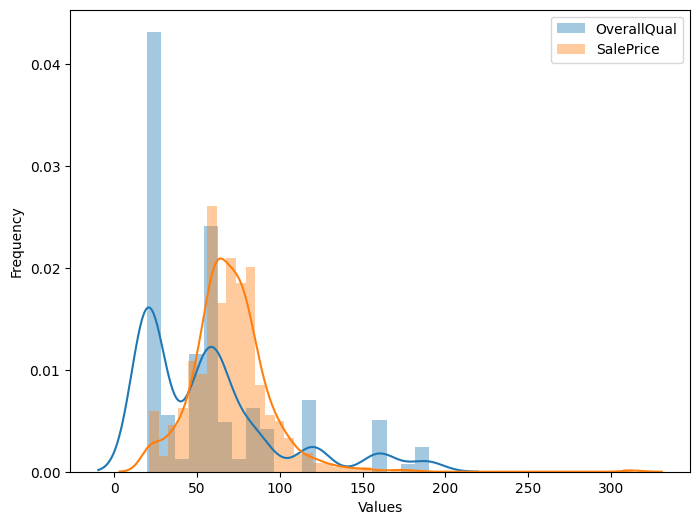

In [24]:
# problem 3

def distributionOfExCols(df :pd.DataFrame):
    num_df = numericalCols(df = df)
    plt.figure(figsize = (8,6))
    sns.distplot(num_df['MSSubClass'],label = 'OverallQual');
    sns.distplot(num_df['LotFrontage'],label = 'SalePrice');
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend();
    
distributionOfExCols(data)


c:\Users\user\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\user\anaconda3\envs\ds\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


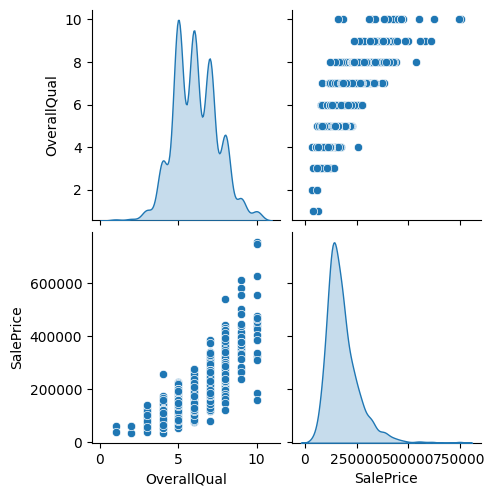

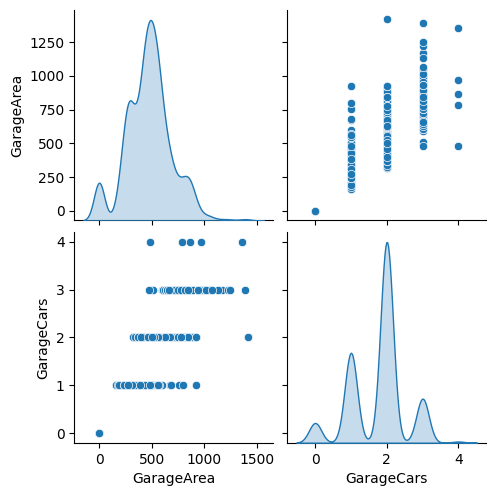

In [20]:
# problem 4

def snsPairPlot(df: pd.DataFrame):
    num_df = numericalCols(df = df)
    kwargs = dict(diag_kind = 'kde', kind = 'scatter')
    sns.pairplot(num_df, **kwargs)
    

snsPairPlot(data[['OverallQual', 'SalePrice']])
snsPairPlot(data[['GarageArea', 'GarageCars']])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000


,OverallQual,SalePrice
std,1.382997,79442.502883
mean,6.099315,180921.195890
max,10.000000,755000.000000
min,1.000000,34900.000000
25%,5.000000,129975.000000
50%,6.000000,163000.000000
75%,7.000000,214000.000000


None

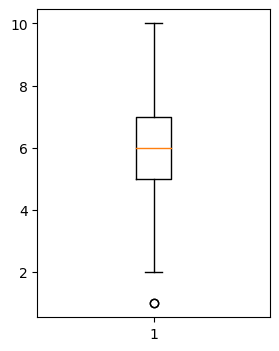

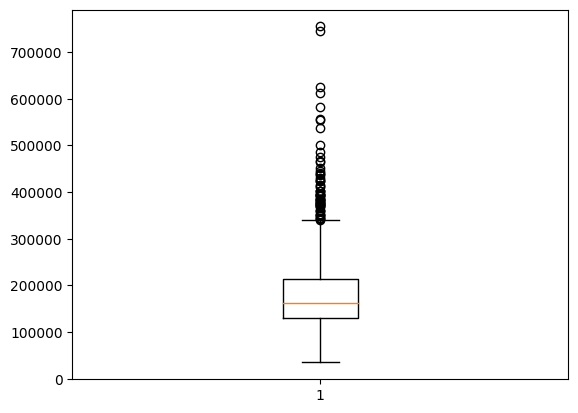

In [26]:
# problem 5

def selfDescribe(df: pd.DataFrame):
    num_df = numericalCols(df = df)
    self_describe = num_df.apply([np.std, np.mean, np.max, np.min])
    
    perc_dict = {}
    for column in num_df.columns:
        first_percantile = np.percentile(num_df[column], q = 25)
        second_percantile = np.percentile(num_df[column], q = 50)
        third_percantile = np.percentile(num_df[column], q = 75)
        perc_dict[column] = [first_percantile, second_percantile, third_percantile]
    
    self_describe = pd.concat([self_describe, pd.DataFrame(perc_dict, index = ['25%', '50%', '75%'])], axis = 0, join = 'inner')
    display(self_describe)

selfDescribe(data)
# allDistributions(data)

# all boxplots are in folder boxplot_folder
def visualizeBox(df: pd.DataFrame):
    num_df = numericalCols(df = df)
    
    for i, column in enumerate(num_df.columns, start = 1):
        plt.figure(figsize = (4,3))
        plt.boxplot(num_df[column])
        plt.title(f'{column} boxplot')
        plt.ylabel('Data')
        plt.savefig(f'{column} boxplot - {i}')
        plt.close()
        
# visualizeBox(data)


ex_col_describes = selfDescribe(data[['OverallQual','SalePrice']])
display(ex_col_describes)

plt.figure(figsize = (3,4))
plt.boxplot(data['OverallQual']);
plt.subplots()
plt.boxplot(data['SalePrice']);

c:\Users\user\anaconda3\envs\ds\Lib\site-packages\matplotlib\collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
dtype: float64


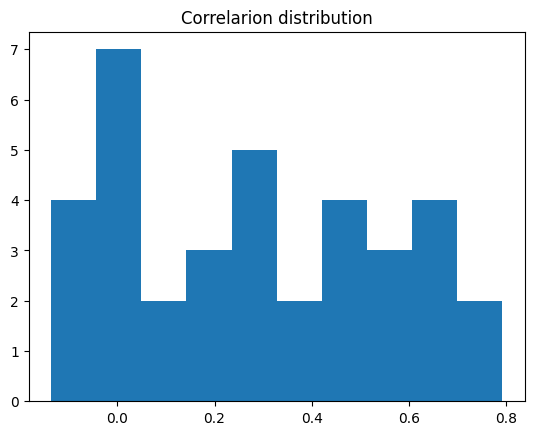

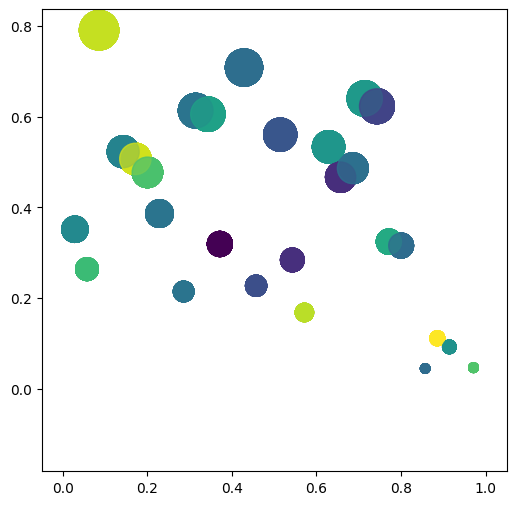

In [27]:
# problem 6

def salePriceCorr(df: pd.DataFrame):
    num_df = numericalCols(df = df)
    
    info_dict = {}
    for column in num_df.columns:
        corr = num_df['SalePrice'].corr(other = num_df[column])
        if column == 'SalePrice':
            break
        info_dict[column] = corr
        
    corr_series = pd.Series(info_dict)
    
    plt.hist(corr_series)
    plt.title('Correlarion distribution')
    plt.figure(figsize = (6,6))
    
    colors = np.random.RandomState(42).randn(corr_series.shape[0])
    for _ in corr_series:
        plt.scatter(x = np.linspace(0,1,corr_series.shape[0]), y = corr_series, s = corr_series * 1000, c = colors, alpha = 0.7)
    
    return corr_series

print(salePriceCorr(data))